In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from beam_moments import get_df_tracker, get_2dhist_tracker, get_mean, get_rms

In [24]:
df_tracker = get_df_tracker()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


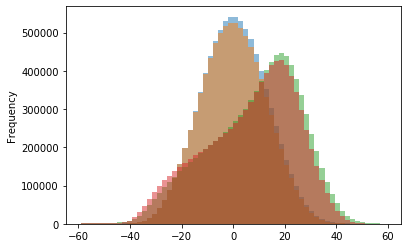

In [29]:
mask1 = df_tracker["Station"] == 'station12'
mask2 = df_tracker["Station"] == 'station18'
(df_tracker[mask2])["vertical"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["vertical"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)
(df_tracker[mask2])["radial"].plot(kind="hist",weights=(df_tracker[mask2])['counts'],bins=60,alpha=0.5)
(df_tracker[mask1])["radial"].plot(kind="hist",weights=(df_tracker[mask1])['counts'],bins=60,alpha=0.5)

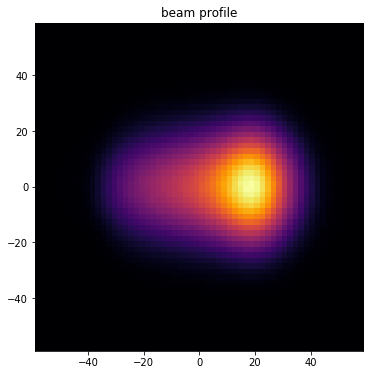

In [25]:
H,xedges,yedges = get_2dhist_tracker(df_tracker,60)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(131, title='beam profile')
plt.imshow(H,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],cmap='inferno')

In [26]:
w = df_tracker['counts']
v = df_tracker['vertical']
r = df_tracker['radial']
m_2 = get_mean(r,w) #the radial mean
m_3 = get_mean(v,w) #the vertical mean
em_2 = get_rms(r,m_2,w) #the radial rms
em_3 = get_rms(v,m_3,w) #the vertical rms